In [91]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pd.read_csv("./Android-Apps/try.csv")

In [32]:
df.head()

,Age,Maturity Level,Content Rating
0,5,1,1
1,13,2,3
2,20,2,5
3,20,0,5
4,28,0,5


In [33]:
df.describe()

,Age,Maturity Level,Content Rating
count,70000.000000,70000.000000,70000.000000
mean,14.977671,0.991257,3.091629
std,8.936218,0.814909,1.803400
min,0.000000,0.000000,0.000000
25%,7.000000,0.000000,1.000000
50%,15.000000,1.000000,3.000000
75%,23.000000,2.000000,5.000000
max,30.000000,2.000000,5.000000


In [34]:
def plot_correlation(x, y):
  plt.scatter(x, y, label='Content Rating')
  plt.xlabel('Age')
  plt.ylabel('Content Rating')
  plt.legend()

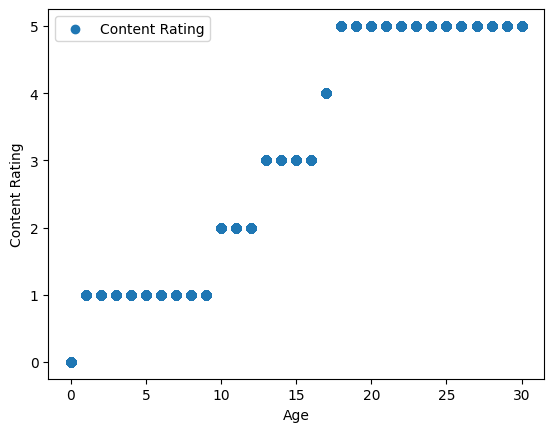

In [35]:
plot_correlation(df["Age"], df["Content Rating"])

In [57]:
train_dataset = df.sample(frac=0.8, random_state=1)
test_dataset = df.drop(train_dataset.index)

In [58]:
train_labels = train_dataset.pop("Content Rating")
train_features = train_dataset

test_labels = test_dataset.pop("Content Rating")
test_features = test_dataset

train_labels.shape

(56000,)

In [59]:
df_copy = df.copy()
labels = df_copy.pop("Content Rating")
features = df_copy

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(features)

In [152]:
model = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax"),
])

In [153]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy()
)

In [154]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 2)                 5         
 tion)                                                           
                                                                 
 dense_30 (Dense)            (None, 64)                192       
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 6)                 390       
                                                                 
Total params: 4747 (18.55 KB)
Trainable params: 4742 (18.52 KB)
Non-trainable params: 5 (24.00 Byte)
_________________________________________________________________


In [155]:
model.fit(
    train_features, 
    train_labels, 
    verbose=1, 
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
1400/1400 [==============================] - 1s 783us/step - loss: 0.1389 - val_loss: 0.2824
Epoch 2/10
1400/1400 [==============================] - 1s 716us/step - loss: 0.0609 - val_loss: 0.0568
Epoch 3/10
1400/1400 [==============================] - 1s 705us/step - loss: 0.0431 - val_loss: 0.0173
Epoch 4/10
1400/1400 [==============================] - 1s 691us/step - loss: 0.0304 - val_loss: 0.0191
Epoch 5/10
1400/1400 [==============================] - 1s 693us/step - loss: 0.0497 - val_loss: 0.0102
Epoch 6/10
1400/1400 [==============================] - 1s 698us/step - loss: 0.0483 - val_loss: 0.0095
Epoch 7/10
1400/1400 [==============================] - 1s 717us/step - loss: 0.0383 - val_loss: 0.0257
Epoch 8/10
1400/1400 [==============================] - 1s 697us/step - loss: 0.0246 - val_loss: 0.0068
Epoch 9/10
1400/1400 [==============================] - 1s 699us/step - loss: 0.0331 - val_loss: 0.0250
Epoch 10/10
1400/1400 [==============================] - 1s 694u

In [156]:
model.evaluate(test_features, test_labels)

438/438 [==============================] - 0s 446us/step - loss: 0.0053


0.005274362396448851

In [157]:
preds = model.predict(test_features)
preds = map(lambda x: np.argmax(x), preds)
preds = list(preds)

438/438 [==============================] - 0s 424us/step


In [158]:
for i in preds[:10]:
    print(i)

print()

for i in test_labels[:10]:
    print(i)

0
5
5
1
1
1
3
1
2
2

0
5
5
1
1
1
3
1
2
2


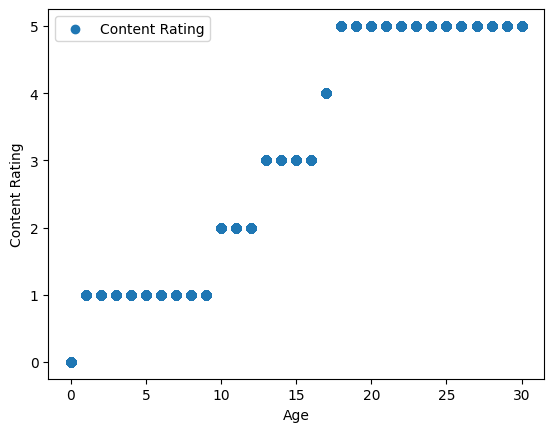

In [159]:
plot_correlation(test_features["Age"], preds)

In [160]:
model.save("new-model-0.1.1")

INFO:tensorflow:Assets written to: new-model-0.1.1/assets


INFO:tensorflow:Assets written to: new-model-0.1.1/assets
